In [871]:
#Importing the libraries

In [904]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [873]:
#Importing The data and savinf as a pandas DataFrame object

In [874]:
data=pd.read_csv(r'C:\Users\Roggh\Downloads\advertising.csv')

In [875]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [876]:
#This gives us the distribution of the two classes through dataset which are to be predicted by model.As You can see the data is is uniformly distributed,both the classes have 500-500 samples each.

In [877]:
data['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [878]:
#Seperating independent and depedent features from the dataset into X and y respectively.

In [879]:
X=data.iloc[:,:-1]

In [880]:
y=data.iloc[:,-1]

In [881]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51


In [882]:
#As you can see the data from various columns have various value ranges.SO having the features in same range makes the algorithm to converge faster than that of features which are not scaled to be in same range

In [883]:
from sklearn.preprocessing import MinMaxScaler
numcols=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']

In [884]:
mms=MinMaxScaler()
X=mms.fit_transform(data[numcols])

C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [885]:
numcols=['Male','Country']

In [886]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [887]:
X=pd.DataFrame(X)
X=pd.concat([data[numcols],X],axis=1)

In [888]:
X

,Male,Country,0,1,2,3
0,0,Tunisia,0.617882,0.380952,0.730472,0.916031
1,1,Nauru,0.809621,0.285714,0.831375,0.538746
2,0,San Marino,0.626721,0.166667,0.699200,0.797433
3,1,Italy,0.706272,0.238095,0.623160,0.854280
4,0,Iceland,0.608023,0.380952,0.914568,0.731323
5,1,Norway,0.465579,0.095238,0.698828,0.738346
6,0,Myanmar,0.957165,0.333333,0.608603,0.627073
7,1,Australia,0.567738,0.690476,0.161813,0.163337
8,1,Grenada,0.712732,0.261905,0.837791,0.706684
9,1,Ghana,0.633690,0.023810,0.635928,0.478508


In [889]:
#Here we Encode the categorical features in the data-Gener and Country.So that after they take numerical value they are interpretable by our model,as Machine learning models can only work with numbers and not strings.(Notice we did not Encode city as it did not made any impact on data so we simply discarded it,but you may keep it to see if it improves accuracy in your case,model)

In [890]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Male']=le.fit_transform(X['Male'])
X['Country']=le.fit_transform(X['Country'])

In [891]:
#Spliting the data intotrining and testing data. 

In [892]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [893]:
#End of Data Preprocessing

In [894]:
#Here we try our first machine learning algorithm-Logistic regression.

In [895]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr=LogisticRegression(C=100)

In [896]:
#here printinh the model with all the hyper-parameters.You can tweak these hyper-parameters to see if the accuracy of the model increase or not.

In [897]:
lr

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [898]:
#Model training

In [899]:
lr.fit(X_train,y_train)

C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [900]:
#Evaluating the accuracy of the model with the help of test data which is never seen by model before.Notice the accuracy on test data is very good as it is able to predict 98% samples Correctly without even seeing them before.

In [901]:
lr.score(X_test,y_test)

0.98

In [903]:
lr.score(X_train,y_train)

0.97

In [906]:
y_pred=lr.predict(X_test)

In [ ]:
#here you can see the precision and recall of the both classes predicted by our model.Pretty Good Right!

In [907]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.97      0.99      0.98        90

   micro avg       0.98      0.98      0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
#Here we try RandomForsetClassifier which is nothing but ensembling many decision trees and taking their prediction and deciding on their combiened outputt,the output of the ensembled model.Here the hyper-paramter of the model n_estimators gives us the freedom to tweak the number of Decision trees tobe used in creating the RandomForestClassifier model.Here 1000 Decision trees are used and ensembled together to form our random forest classifier.this is type of bagging ensembling where many individual decision trees(Week Models) are ensembled paralelly. 

In [909]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=1000,random_state=42,max_depth=4)

In [910]:
rfr

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [911]:
rfr.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [912]:
rfr.score(X_test,y_test)

0.965

In [913]:
rfr.score(X_train,y_train)

0.98

In [914]:
y_pred=rfr.predict(X_test)

In [ ]:
#This model is also very good at predicting the classes by seeing the independet features,but not as good as our logistic regression model.

In [915]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.96      0.97      0.96        91

   micro avg       0.96      0.96      0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [ ]:
#xgboost is the type of boosting ensembled modelling where models are ensembled sequentially and not prallely like as in bagging ensembling.

In [916]:
import xgboost

In [917]:
xg=xgboost.XGBClassifier(n_estimators=100,max_depth=3)

In [918]:
xg

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [919]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [920]:
xg.score(X_test,y_test)

0.96

In [921]:
xg.score(X_train,y_train) #Little Overfitting

0.98875

In [922]:
y_pred=xg.predict(X_test)

In [ ]:
#this model of Xgboost as it is slightly overfiting,is not as good as Logistic regression for this data.

In [924]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       110
           1       0.95      0.97      0.96        90

   micro avg       0.96      0.96      0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
#Using the Multinomial Navie Bayes algorithm here.

In [415]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()

In [416]:
mb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [928]:
mb.score(X_train,y_train)

0.73

In [929]:
mb.score(X_test,y_test)

0.75

In [930]:
y_pred=mb.predict(X_test)

In [931]:
#The Multinomial naive bayes algorithm performs very badly on the data as it underfitting the data.

In [932]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       102
           1       0.76      0.71      0.74        98

   micro avg       0.75      0.75      0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [ ]:
#here we use Knn algorithm

In [938]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [939]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [940]:
knn.score(X_test,y_test) #overfitting too!

0.69

In [941]:
knn.score(X_train,y_train) #Not that good comapred to other algorithms

0.86625

In [942]:
y_pred=knn.predict(X_test)

In [943]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       100
           1       0.71      0.65      0.68       100

   micro avg       0.69      0.69      0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



In [944]:
#here we use the support Vector machine using the polynomial kerenel to fit the data using polynomial degree=3.

In [945]:
from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=3)

In [946]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [947]:
svc.fit(X_train,y_train)

C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [948]:
svc.score(X_test,y_test)  

0.885

In [949]:
svc.score(X_train,y_train) #The model is not best but good at classifying the data.

0.87375

In [950]:
y_pred=svc.predict(X_test)

In [952]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       109
           1       0.87      0.88      0.87        91

   micro avg       0.89      0.89      0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



In [ ]:
#here using single decision tree for the prediction of class.

In [646]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1,max_depth=3)

In [647]:
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [648]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [649]:
dtc.score(X_test,y_test)

0.956

In [650]:
dtc.score(X_train,y_train) #here you can see a little bit of iverfitting if you keep the max_depth parameter as default.By keeping the max_depth to 3 we are prunning the depth and avoiding the overfitting of the model to data.

0.964

In [ ]:
#last model that we are using is a Artificial Neural Network for producing the prediction of classes.

In [967]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [968]:
model=Sequential() #sequential model(Fully connected)

In [969]:
model.add(Dense(6,activation='relu',input_dim=6)) # setting the input dimention to 6(No. of Features) and adding a first hidden laytyer of 6 neurons  with the activation function relu.

In [970]:
model.add(Dense(1,activation='sigmoid')) #adding the output layer,keeping only one node in the layer and keeping its activation function to sigmoid as it is used for binary classification.

In [971]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc']) #compiling the model with adam optimizer and loss function as binary_crossentropy

In [972]:
history=model.fit(X_train,y_train,epochs=300) #Training the model with 300 epochs(iterations of forward and backpropagation combined)

Epoch 1/300
800/800 [==============================] - 0s 486us/step - loss: 6.6461 - acc: 0.5100
Epoch 2/300
800/800 [==============================] - 0s 61us/step - loss: 6.1809 - acc: 0.5113
Epoch 3/300
800/800 [==============================] - 0s 66us/step - loss: 4.6295 - acc: 0.5138
Epoch 4/300
800/800 [==============================] - 0s 64us/step - loss: 0.9033 - acc: 0.5537
Epoch 5/300
800/800 [==============================] - 0s 57us/step - loss: 0.6402 - acc: 0.6587
Epoch 6/300
800/800 [==============================] - 0s 66us/step - loss: 0.6236 - acc: 0.6888
Epoch 7/300
800/800 [==============================] - 0s 65us/step - loss: 0.6126 - acc: 0.7212
Epoch 8/300
800/800 [==============================] - 0s 62us/step - loss: 0.6089 - acc: 0.7437
Epoch 9/300
800/800 [==============================] - 0s 65us/step - loss: 0.6030 - acc: 0.7563
Epoch 10/300
800/800 [==============================] - 0s 66us/step - loss: 0.6018 - acc: 0.7325
Epoch 11/300
800/800 [======

800/800 [==============================] - 0s 65us/step - loss: 0.2427 - acc: 0.9413
Epoch 85/300
800/800 [==============================] - 0s 65us/step - loss: 0.2392 - acc: 0.9400
Epoch 86/300
800/800 [==============================] - 0s 75us/step - loss: 0.2337 - acc: 0.9425
Epoch 87/300
800/800 [==============================] - 0s 61us/step - loss: 0.2316 - acc: 0.9400
Epoch 88/300
800/800 [==============================] - 0s 59us/step - loss: 0.2295 - acc: 0.9413
Epoch 89/300
800/800 [==============================] - 0s 56us/step - loss: 0.2387 - acc: 0.9325
Epoch 90/300
800/800 [==============================] - 0s 57us/step - loss: 0.2220 - acc: 0.9438
Epoch 91/300
800/800 [==============================] - 0s 59us/step - loss: 0.2172 - acc: 0.9413
Epoch 92/300
800/800 [==============================] - 0s 65us/step - loss: 0.2152 - acc: 0.9438
Epoch 93/300
800/800 [==============================] - 0s 59us/step - loss: 0.2159 - acc: 0.9450
Epoch 94/300
800/800 [===========

800/800 [==============================] - 0s 67us/step - loss: 0.1427 - acc: 0.9500
Epoch 168/300
800/800 [==============================] - 0s 66us/step - loss: 0.1390 - acc: 0.9538
Epoch 169/300
800/800 [==============================] - 0s 57us/step - loss: 0.1414 - acc: 0.9538
Epoch 170/300
800/800 [==============================] - 0s 54us/step - loss: 0.1408 - acc: 0.9525
Epoch 171/300
800/800 [==============================] - 0s 55us/step - loss: 0.1482 - acc: 0.9513
Epoch 172/300
800/800 [==============================] - 0s 65us/step - loss: 0.1453 - acc: 0.9588
Epoch 173/300
800/800 [==============================] - 0s 55us/step - loss: 0.1371 - acc: 0.9525
Epoch 174/300
800/800 [==============================] - 0s 57us/step - loss: 0.1397 - acc: 0.9550
Epoch 175/300
800/800 [==============================] - 0s 55us/step - loss: 0.1377 - acc: 0.9500
Epoch 176/300
800/800 [==============================] - 0s 55us/step - loss: 0.1409 - acc: 0.9525
Epoch 177/300
800/800 [=

800/800 [==============================] - 0s 60us/step - loss: 0.1335 - acc: 0.9563
Epoch 250/300
800/800 [==============================] - 0s 61us/step - loss: 0.1198 - acc: 0.9625
Epoch 251/300
800/800 [==============================] - 0s 59us/step - loss: 0.1219 - acc: 0.9613
Epoch 252/300
800/800 [==============================] - 0s 65us/step - loss: 0.1302 - acc: 0.9600
Epoch 253/300
800/800 [==============================] - 0s 69us/step - loss: 0.1184 - acc: 0.9625
Epoch 254/300
800/800 [==============================] - 0s 59us/step - loss: 0.1226 - acc: 0.9563
Epoch 255/300
800/800 [==============================] - 0s 57us/step - loss: 0.1219 - acc: 0.9575
Epoch 256/300
800/800 [==============================] - 0s 56us/step - loss: 0.1206 - acc: 0.9588
Epoch 257/300
800/800 [==============================] - 0s 54us/step - loss: 0.1181 - acc: 0.9613
Epoch 258/300
800/800 [==============================] - 0s 55us/step - loss: 0.1188 - acc: 0.9613
Epoch 259/300
800/800 [=

In [973]:
model.evaluate(X_test,y_test) #evaluating the model accuracy is good but not the best as comapred to logistic regression.

200/200 [==============================] - 0s 952us/step


[0.09373960018157959, 0.9750000238418579]

In [974]:
y_pred=model.predict(X_test)

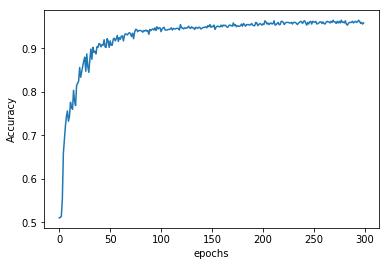

In [981]:
plt.plot(history.history['acc'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#As You can see at start about 50 epochs accuracy kept increasing rapidly and after that it became plateu.
#Deep Learning(NN) in most cases best compared to machine learning models but not always the required technique 
#for the regression and classification task.
#So You will need to try everything for your data,and use that model which performs well on.
#But Generally Speaking Deep Learning almost always outperforms traditional Machine learning algorithms,
#when having significantly large amount of data.